In [22]:
import optuna
import numpy as np
import pandas as pd
import sklearn
from sklearn import linear_model
from sklearn import ensemble
from sklearn import datasets
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import fbeta_score, make_scorer
import shap
from matplotlib import pyplot as plt

In [2]:
raw = pd.read_csv('onehot_train.csv')

In [23]:
ftwo_scorer = make_scorer(fbeta_score, beta=1.5)

#Grabbing a sklearn Classification dataset:
train_x = raw.iloc[:,3:]
train_y = raw.iloc[:,2]

#Step 1. Define an objective function to be maximized.
def objective(trial):
    list_trees = [25, 50, 75, 100, 125, 150, 175, 200, 225, 250]
    
    n_estimators = trial.suggest_categorical('n_estimators', list_trees)
    min_samples_split = trial.suggest_categorical("min_samples_split", [2, 5, 10])
    min_samples_leaf = trial.suggest_categorical("min_samples_leaf", [1, 2, 4])
    bootstrap = trial.suggest_categorical("bootstrap", [True, False])

    max_depth = int(trial.suggest_float('max_depth', 1, 64, log=True))
    max_features = trial.suggest_uniform("max_features", 0.15, 1.0)
    max_samples = trial.suggest_uniform('max_samples', 0.6, 0.99)
    
    clf = sklearn.ensemble.RandomForestClassifier(
    n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
                max_features=max_features, bootstrap=bootstrap,  max_samples=max_samples)

    sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    sss.get_n_splits(train_x, train_y)

    

    for train_index, test_index in sss.split(X, y):
        print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]



    
    return sklearn.model_selection.cross_val_score(
        clf, train_x, train_y, n_jobs=-1, cv=3, scoring='f1').mean()




In [21]:
train_y.value_counts()

0    10046
1      619
Name: PerStatus, dtype: int64

In [11]:
colnames = train_x.columns
train_x.columns = np.arange(len(colnames))

In [24]:
# Step 4: Running it
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

[I 2020-12-13 01:39:17,547] A new study created in memory with name: no-name-aef50e26-ebcd-49cf-be8e-65b61211e695
[I 2020-12-13 01:39:43,348] Trial 0 finished with value: 0.07138210878641782 and parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'bootstrap': True, 'max_depth': 33.42685620678158, 'max_features': 0.6721237941329169, 'max_samples': 0.7527291116667213}. Best is trial 0 with value: 0.07138210878641782.
[I 2020-12-13 01:39:46,667] Trial 1 finished with value: 0.0 and parameters: {'n_estimators': 175, 'min_samples_split': 2, 'min_samples_leaf': 2, 'bootstrap': True, 'max_depth': 3.0864899894704196, 'max_features': 0.3678443465258431, 'max_samples': 0.7779066313939913}. Best is trial 0 with value: 0.07138210878641782.
[I 2020-12-13 01:39:49,794] Trial 2 finished with value: 0.08952114455732008 and parameters: {'n_estimators': 25, 'min_samples_split': 2, 'min_samples_leaf': 1, 'bootstrap': True, 'max_depth': 24.657623649572013, 'max_features': 0.8

[I 2020-12-13 01:45:30,619] Trial 24 finished with value: 0.13726764290429236 and parameters: {'n_estimators': 125, 'min_samples_split': 2, 'min_samples_leaf': 1, 'bootstrap': False, 'max_depth': 25.505512232564474, 'max_features': 0.7882592545367189, 'max_samples': 0.9186943954660486}. Best is trial 14 with value: 0.14674538358748884.
[I 2020-12-13 01:46:12,389] Trial 25 finished with value: 0.14566377988537876 and parameters: {'n_estimators': 125, 'min_samples_split': 2, 'min_samples_leaf': 1, 'bootstrap': False, 'max_depth': 21.272901774086385, 'max_features': 0.7738707237561727, 'max_samples': 0.9320578584218484}. Best is trial 14 with value: 0.14674538358748884.
[I 2020-12-13 01:46:40,697] Trial 26 finished with value: 0.14726046329862777 and parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'bootstrap': False, 'max_depth': 19.324744512478926, 'max_features': 0.9136003219997533, 'max_samples': 0.9272026304054933}. Best is trial 26 with value: 0.14726

[I 2020-12-13 02:02:51,892] Trial 48 finished with value: 0.14378462088272081 and parameters: {'n_estimators': 175, 'min_samples_split': 2, 'min_samples_leaf': 4, 'bootstrap': False, 'max_depth': 30.54700711201022, 'max_features': 0.9632828648001481, 'max_samples': 0.8127289209124816}. Best is trial 31 with value: 0.1554750252176187.
[I 2020-12-13 02:04:05,269] Trial 49 finished with value: 0.1291256541015461 and parameters: {'n_estimators': 250, 'min_samples_split': 5, 'min_samples_leaf': 1, 'bootstrap': False, 'max_depth': 38.28761247324355, 'max_features': 0.8522400782545178, 'max_samples': 0.7575877371162435}. Best is trial 31 with value: 0.1554750252176187.
[I 2020-12-13 02:04:51,691] Trial 50 finished with value: 0.14059598745219304 and parameters: {'n_estimators': 175, 'min_samples_split': 2, 'min_samples_leaf': 2, 'bootstrap': False, 'max_depth': 46.978396144782856, 'max_features': 0.9990697403996545, 'max_samples': 0.8997488900522248}. Best is trial 31 with value: 0.1554750252

[I 2020-12-13 02:19:48,804] Trial 72 finished with value: 0.14155585232989992 and parameters: {'n_estimators': 250, 'min_samples_split': 2, 'min_samples_leaf': 1, 'bootstrap': False, 'max_depth': 38.50523768364487, 'max_features': 0.8630224627288589, 'max_samples': 0.9074896897398074}. Best is trial 31 with value: 0.1554750252176187.
[I 2020-12-13 02:20:48,686] Trial 73 finished with value: 0.1422258703966196 and parameters: {'n_estimators': 250, 'min_samples_split': 2, 'min_samples_leaf': 1, 'bootstrap': False, 'max_depth': 31.55012067095257, 'max_features': 0.9208514030524435, 'max_samples': 0.6140693440339919}. Best is trial 31 with value: 0.1554750252176187.
[I 2020-12-13 02:21:04,670] Trial 74 finished with value: 0.1334286369937432 and parameters: {'n_estimators': 75, 'min_samples_split': 2, 'min_samples_leaf': 1, 'bootstrap': False, 'max_depth': 43.64709727960949, 'max_features': 0.7979712981067206, 'max_samples': 0.9425731646177548}. Best is trial 31 with value: 0.1554750252176

[I 2020-12-13 02:32:53,595] Trial 96 finished with value: 0.1346504551463291 and parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'bootstrap': False, 'max_depth': 30.60881800975278, 'max_features': 0.8240032068124201, 'max_samples': 0.8717675566225854}. Best is trial 31 with value: 0.1554750252176187.
[I 2020-12-13 02:33:53,858] Trial 97 finished with value: 0.1405983168897674 and parameters: {'n_estimators': 250, 'min_samples_split': 2, 'min_samples_leaf': 2, 'bootstrap': False, 'max_depth': 46.12399005245475, 'max_features': 0.9542125850432854, 'max_samples': 0.8498936107697954}. Best is trial 31 with value: 0.1554750252176187.
[I 2020-12-13 02:34:33,748] Trial 98 finished with value: 0.150307177005207 and parameters: {'n_estimators': 175, 'min_samples_split': 2, 'min_samples_leaf': 1, 'bootstrap': False, 'max_depth': 35.98307208217511, 'max_features': 0.8961145079190382, 'max_samples': 0.8861801263137895}. Best is trial 31 with value: 0.15547502521761

In [25]:
# f_beta
print(f"The best value is : \n{study.best_value}")
print(f"The best parameters are : \n{study.best_params}")

The best value is : 
0.1554750252176187
The best parameters are : 
{'n_estimators': 175, 'min_samples_split': 2, 'min_samples_leaf': 1, 'bootstrap': False, 'max_depth': 33.24780175588958, 'max_features': 0.8962283675436249, 'max_samples': 0.9846462428612502}


In [19]:
print(f"The best trial is : \n{study.best_trial}")

The best trial is : 
FrozenTrial(number=22, value=0.14858269838093754, datetime_start=datetime.datetime(2020, 12, 11, 23, 44, 20, 473750), datetime_complete=datetime.datetime(2020, 12, 11, 23, 44, 39, 415577), params={'n_estimators': 75, 'min_samples_split': 10, 'min_samples_leaf': 1, 'bootstrap': False, 'max_depth': 14.822865724153461, 'max_features': 0.9989247644028549, 'max_samples': 0.936862230757678}, distributions={'n_estimators': CategoricalDistribution(choices=(25, 50, 75, 100, 125, 150, 175, 200, 225, 250)), 'min_samples_split': CategoricalDistribution(choices=(2, 5, 10)), 'min_samples_leaf': CategoricalDistribution(choices=(1, 2, 4)), 'bootstrap': CategoricalDistribution(choices=(True, False)), 'max_depth': LogUniformDistribution(high=64, low=1), 'max_features': UniformDistribution(high=1.0, low=0.15), 'max_samples': UniformDistribution(high=0.99, low=0.6)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=22, state=TrialState.COMPLETE)


In [20]:
print(f"The best value is : \n{study.best_value}")

The best value is : 
0.14858269838093754


In [21]:
print(f"The best parameters are : \n{study.best_params}")

The best parameters are : 
{'n_estimators': 75, 'min_samples_split': 10, 'min_samples_leaf': 1, 'bootstrap': False, 'max_depth': 14.822865724153461, 'max_features': 0.9989247644028549, 'max_samples': 0.936862230757678}


In [5]:
best_parms = {'n_estimators': 75, 'min_samples_split': 10, 'min_samples_leaf': 1, 'bootstrap': False, 'max_depth': 14.822865724153461, 'max_features': 0.9989247644028549, 'max_samples': 0.936862230757678}

In [13]:

clf = RandomForestClassifier(**best_parms)
clf.fit(train_x, train_y)

RandomForestClassifier(bootstrap=False, max_depth=14.822865724153461,
                       max_features=0.9989247644028549,
                       max_samples=0.936862230757678, min_samples_split=10,
                       n_estimators=75)

In [15]:
colnames

Index(['專案時數', '專案總數', '特殊專案佔比', '訓練時數A', '訓練時數B', '訓練時數C', '生產總額', '榮譽數',
       '升遷速度', '近三月請假數A', '近一年請假數A', '近三月請假數B', '近一年請假數B', '出差數A', '出差數B',
       '出差集中度', '年度績效等級A', '年度績效等級B', '年度績效等級C', '年齡層級', '年資層級A', '年資層級B',
       '年資層級C', '任職前工作平均年數', '眷屬量', '通勤成本', '歸屬部門', 'sex_0.0', 'sex_1.0',
       '工作分類_1.0', '工作分類_2.0', '職等_1.0', '職等_2.0', '職等_3.0', '職等_4.0',
       '職等_5.0', '職等_6.0', '職等_7.0', '職等_8.0', '廠區代碼_2.0', '廠區代碼_4.0',
       '廠區代碼_5.0', '廠區代碼_6.0', '廠區代碼_8.0', '廠區代碼_9.0', '廠區代碼_10.0',
       '廠區代碼_11.0', '廠區代碼_13.0', '廠區代碼_14.0', '廠區代碼_16.0', '廠區代碼_17.0',
       '廠區代碼_18.0', '廠區代碼_19.0', '廠區代碼_20.0', '管理層級_1.0', '管理層級_2.0',
       '管理層級_3.0', '管理層級_4.0', '管理層級_5.0', '管理層級_6.0', '工作資歷1_0.0',
       '工作資歷1_1.0', '工作資歷2_0.0', '工作資歷2_1.0', '工作資歷3_0.0', '工作資歷3_1.0',
       '工作資歷4_0.0', '工作資歷4_1.0', '工作資歷5_0.0', '工作資歷5_1.0', '當前專案角色_1.0',
       '當前專案角色_2.0', '當前專案角色_3.0', '當前專案角色_5.0', '工作地點_1.0', '工作地點_2.0',
       '工作地點_3.0', '工作地點_4.0', '工作地點_5.0', '工作地點_6.0', '工作地點_8.

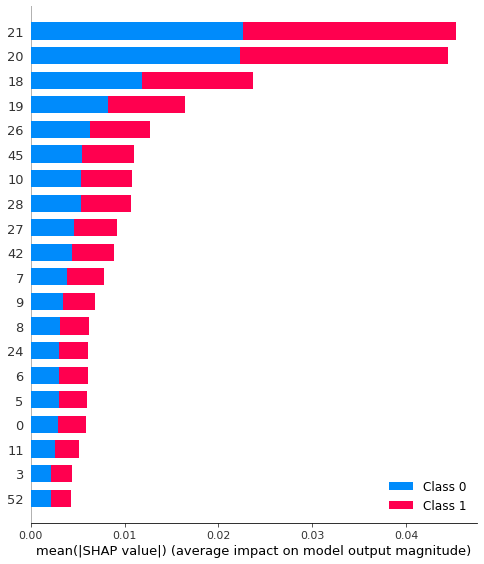

In [14]:
shap_values = shap.TreeExplainer(clf).shap_values(train_x)
shap.summary_plot(shap_values, train_x, plot_type="bar")

In [18]:
colnames[[21,20,18,19,26,45,10,28,27,42,7,9,8,24,6,5,0,11,3,52]]

Index(['年資層級B', '年資層級A', '年度績效等級C', '年齡層級', '歸屬部門', '廠區代碼_10.0', '近一年請假數A',
       'sex_1.0', 'sex_0.0', '廠區代碼_6.0', '榮譽數', '近三月請假數A', '升遷速度', '眷屬量',
       '生產總額', '訓練時數C', '專案時數', '近三月請假數B', '訓練時數A', '廠區代碼_19.0'],
      dtype='object')

In [33]:

sorted_idx = clf.feature_importances_.argsort()
plt.barh(train_x.columns[sorted_idx], clf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

NameError: name 'plt' is not defined